**Содержание темы**

1. Теория

2. [Практика 1](https://colab.research.google.com/drive/1hD2iZeqMoH8oITN7AFWOGiB9CMdwuvlw?usp=sharing) 

3. [Практика 2](https://colab.research.google.com/drive/1u-C4YluObVMEcjeOk8WnqQGm5AueaK_i?usp=sharing)

## Задача кластеризации

Мы с вами уже сталкивались с задачами классификации объектов. В чем же отличие между классификацией и кластеризацей? Какие алгоритмы кластеризации существуют?  И который из них лучше всего применить в конкретной задаче? Все эти и многие другие вопросы мы разберем в ходе урока и посмотрим, как применить полученные знания на примере кластеризации базы HeadHunter.

Задача кластеризации заключается в разбиении набора данных на группы, называемые кластерами. По сути, это классификация, в её основе лежит сходство объектов друг с другом, но принадлежность обучающих объектов каким-либо классам не задана.  

Задача кластеризации относится к классу обучения без учителя.

---
**Кластеризация** (англ. *cluster analysis*) - группировка множества
объектов на подмножества (кластеры) таким образом, чтобы объекты
из одного кластера были более похожи друг на друга, чем на объекты
из других кластеров по какой-либо метрике. 

---



## Примеры задач кластеризации

- Онлайн маркетинг. Специалистам приходится изучать поведение покупателя и составлять типичный шаблон его покупок. 

- Логистика. Существуют задачи расположения точек продаж, правильное распределение которых обеспечит больший приток покупателей.

- СМИ. Кластеризация новостей по темам и блокам, предложение пользователю наиболее интересных.

- Объединение неклассифицированных данных. Часто в задачах, где нет строго определенных классов кластеризация помогает сформировать блоки, близкие по определенным признакам и параметрам.



## Алгоритмы кластеризации

Алгоритмов кластеризации достаточно много, каждый из них применим для определенных задач и имеет большое количество индивидуальных параметров. 

Для того, чтобы показать различия в обработке данных, создадим следующие наборы данных (на рисунке сверху вниз):

- Точки данных заключены в две концентрические окружности
- Точки данных образуют два чередующихся полукруга
- Блоки данных с переменной дисперсией
- Анизотропно распределенные блоки данных
- Точки данных имеют форму гауссовых блоков
- Равномерно распределенные данные.

В скрытом коде, который является справочным, параметры создаваемых данных и алгоритмов не рассматриваются подробно, так как мы используем их только для визуализации работы алгоритмов кластеризации, которые предлагает нам библиотека `sklearn`. Более подробно мы рассмотрим некоторые из них далее.

Запустим 10 алгоритмов кластеризации (MiniBatch KMeans, Affinity Propagation ...) из библиотеки `sklearn` на этих наборах данных (т.е. каждый алгоритм обрабатывает 6 наборов):

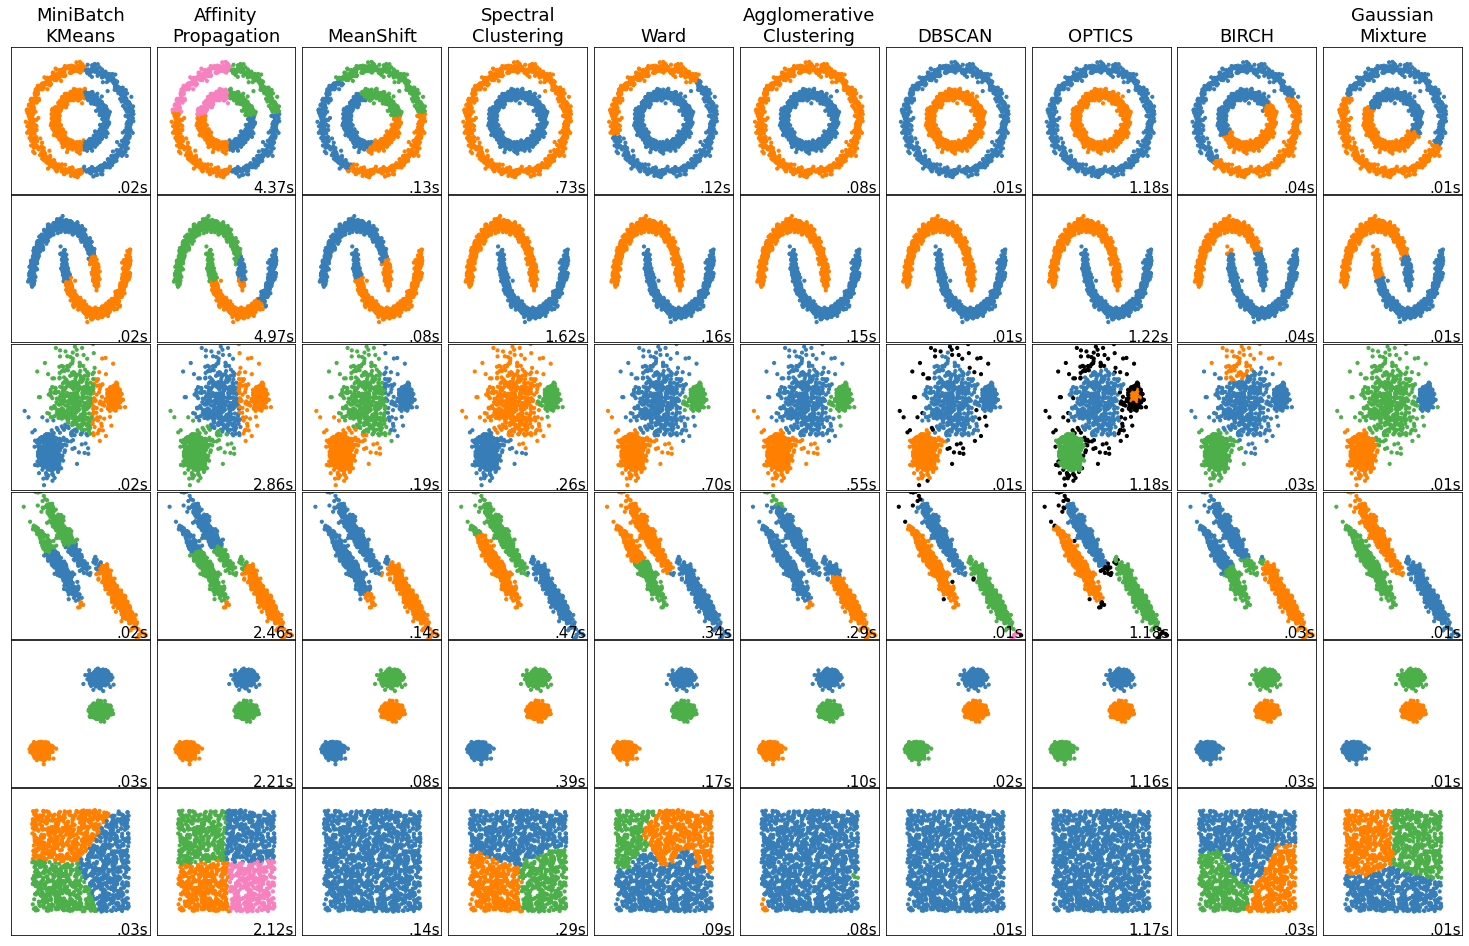

In [ ]:
#@title
# Справочный код для визуализации алгоритмов кластеризации
# Модуль для расчета времени выполнения
import time

# Модуль для скрытия предупреждений
import warnings

# Библиотека для работы с массивами
import numpy as np

# Библиотека для построения графиков
import matplotlib.pyplot as plt

# Модули для создания набора данных
from sklearn import cluster, datasets, mixture


from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# Создание наборов данных. 
# Достаточно большой размер данных нужен для того, чтобы увидеть
# масштабируемость алгоритмов, но не слишком, 
# чтобы избежать длительного времени выполнения

# Задание количества точек
n_samples = 1500

# Создание данных
# Точки данных заключены в две концентрические окружности
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)

# Точки данных образуют два чередующихся полукруга
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

# Точки данных имеют форму кластеров гауссовых блоков
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)

# Равномерно распределенные данные
no_structure = np.random.rand(n_samples, 2), None

# Анизотропно распределенные блоки данных
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# Блок данных с переменной дисперсией
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)


# Задание параметров кластера

plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.95, wspace=.05,
                    hspace=.01)

plot_num = 1

# Общие параметры по умолчанию
default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

# Идивидуальные параметры для наборов данных 
datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # Обновление параметров со значениями, зависящими от набора данных
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # Нормализация 
    X = StandardScaler().fit_transform(X)

    # Оценка пропускной способности для алгоритма среднего сдвига
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # Матрица связности
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # Симметризация
    connectivity = 0.5 * (connectivity + connectivity.T)

    # Создание объектов кластера для каждого алгоритма
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    optics = cluster.OPTICS(min_samples=params['min_samples'],
                            xi=params['xi'],
                            min_cluster_size=params['min_cluster_size'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')
    
    # Список названий и алгоритмов
    clustering_algorithms = (
        ('MiniBatch\nKMeans', two_means),
        ('Affinity\nPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('Spectral\nClustering', spectral),
        ('Ward', ward),
        ('Agglomerative\nClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('OPTICS', optics),
        ('BIRCH', birch),
        ('Gaussian\nMixture', gmm)
    )

    # Перебор и запуск всех алгоритмов на разных данных
    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # Фильтр предупреждений
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        # Работа алгоритмов с отображением результатов и контролем времени
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        
        # Добавление черного цвета для выбросов
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

Как оценить результат работы алгоритмы? Рассмотрим на примере двух окружностей. Четыре алгоритма из 10 смогли полностью выделить обе, раскрасив их в разные цвета. Шесть алгоритмов с поставленной задачей не справились, потому что отнесли к одному класу половину одной окружности, и половину второй, что неверно.

Как оценить результат работы алгоритмы? 

Например, с кластерами, имеющими форму гауссовых блоков, справились все алгоритмы. Каждый алгоритм четко выделил блок своим цветом.

А вот для концентрического набора данных наиболее подходящими являются алгоритмы *Spectral Clustering*, *Agglomerative Clustering*, *DBSCAN* и *OPTICS*. Четыре алгоритма из 10 смогли полностью выделить обе, раскрасив их в разные цвета. Шесть алгоритмов с поставленной задачей не справились, потому что отнесли к одному класу половину одной окружности, и половину второй, что неверно.

Однако, есть и общее для всех методов кластеризации правило: они основываются на метриках и очень чувствительны к одному масштабу данных. Поэтому важным инструментом в работе с ними будет **StandardScaler** или **MinMaxScaler**.

Остановимся на трёх алгоритмах: *K-Means*, *Agglomerative Clustering* и *DBSCAN*. Для визуализации работы алгоритмов будем использовать библиотеку **mglearn**.

In [ ]:
# Установка библиотеки для визуализации работы алгоритмов
!pip install mglearn
!pip install joblib==1.1.0

import mglearn.plots 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 KB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=f34859a5d6fb63d96e349d2c9a63c01f183416e023dd68a0e0136be70a8d6a1a
  Stored in directory: /root/.cache/pip/wheels/87/75/37/404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 KB 6.5 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


### Алгоритм K-Means

Алгоритм кластеризации *K-Means* - наиболее простой и распространенный из алгоритмов кластеризации. Его цель - минимизировать внутриклассовые отличия от центроида. Заключается он в следующем:

1. Выбирается число кластеров - главный параметр алгоритма *K-Means*.
2. Задается произвольное положение центров кластеров.
3. Для каждой точки вычисляется евклидово расстояние до каждого центра кластера.
4. Каждая точка назначается ближайшему центру.
5. Вычисляются центроиды. Центроид представляет собой вектор из средних значений характеристик всех точек кластера.
6. Происходит смещение центра кластера в центроид.
7. Изменение центров кластеров и переназначение точек повторяется до тех пор, пока расположение центроидов и границы кластеров не станут постоянными.

Визуализируем этот процесс с помощью **mglearn**:

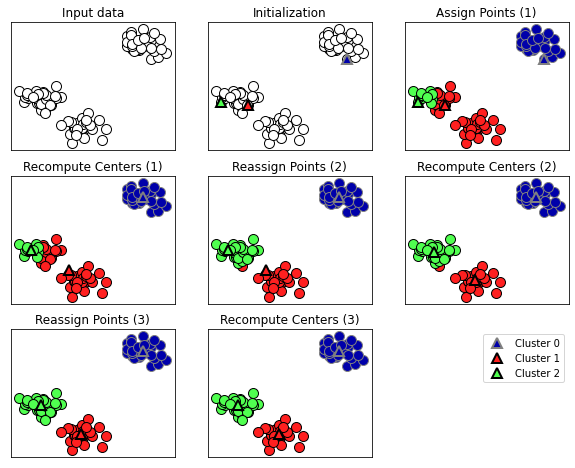

In [ ]:
# Визуализация алгоритма K-Means
mglearn.plots.plot_kmeans_algorithm()

Казалось бы, алгоритм прекрасно справился со своей задачей, но и у него есть ряд ограничений:
- зависимость от числа кластеров;
- строгие предположения о форме кластеров;
- зависит от случайной инициализации (случайные стартовые значения центров кластеров); 
- данные с переменной дисперсией.

Давайте посмотрим, как и какими способами можно справиться с частью ограничений алгоритма.

**Количество кластеров**

В том случае, если количество кластеров изначально неизвестно, можно воспользоваться перебором значений от 1 до n и посмотреть, с какого момента сумма квадратов расстояний от точек до центроидов кластеров перестанет быстро улучшаться.

**Случайная инициализация**

Данный метод сойдется всегда, но к разным локальным минимумам. Для нахождения лучшего варианта **sklearn** запускает алгоритм 10 раз с 10-ю различными стартовыми значениями и возвращает лучший из них.

**Строгие формы кластеров**

С данным недостатком методом *K-Means* справиться не получится, поэтому обратимся к следующим двум алгоритмам.


### Алгоритм Agglomerative Clustering

Идея алгоритма заключается в том, что каждая точка данных заносится в свой кластер, по ходу выполнения алгоритма наиболее схожие кластеры объединяются до тех пор, пока кластеры не будут удовлетворять условию критерия остановки (числу кластеров).

Визуализирем с помощью **mglearn**:

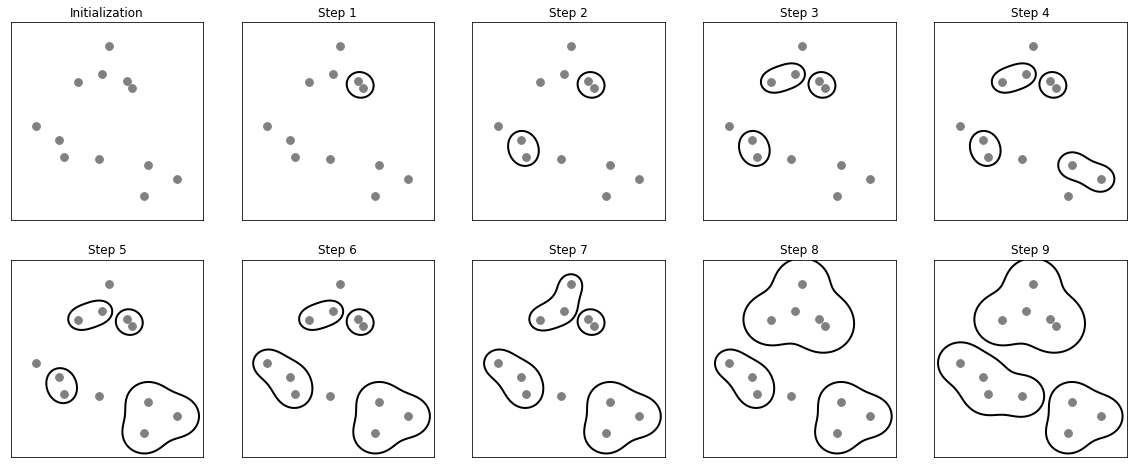

In [ ]:
mglearn.plots.plot_agglomerative_algorithm()

Объединение в кластеры в алгоритме *Agglomerative Clustering* может осуществляться тремя методами:
1. Метод Уорда (по умолчанию) - **Ward**. В основе лежит такое объединение в кластеры, при котором обеспечивается минимальный прирост дисперсии внутри кластеров. 
2. Метод максимальной (полной) связи - **complete**. В качестве критерия объединения берется наименьшее расстояние между двумя самыми удаленными точками.
3. Метод средней связи - **average**. В основе этого метода лежит среднее значение расстояния между точками разных кластеров.

По своей сути данный алгоритм является иерархической кластеризацией. То есть кластеризация итеративно происходит на каждом шаге с различным количеством кластеров.

Иерархию, путь от первого кластера до итогового также можно посмотреть с помощью **mglearn**:

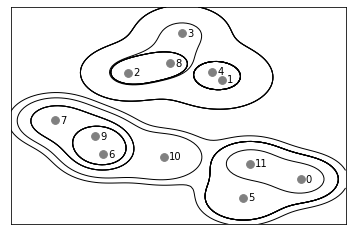

In [ ]:
mglearn.plots.plot_agglomerative()

Данный метод визуализации применим к двумерным данным. Для многомерных данных визуализация осуществляется с помощью дендрограмм из библиотеки **SciPy**, их мы реализуем в практической части занятия.

Алгоритм *Agglomerative Clustering* справляется с большинством видов рассмотренных нами данных, но также, как и *K-Means*, неверно кластеризует точки анизотропно распределенных данных. Для кластеризации таких данных можно использовать алгоритм *DBSCAN*.

### Алгоритм DBSCAN

Идея данного алгоритма заключается в том, что кластеры представляют собой плотные области данных, которые разделены между собой относительно пустым пространством.

Все точки делятся на три типа:
- ядра (в окрестности точки >= n точек);
- достижимые из ядра (в окрестности < n точек, > 0 ядер);
- выбросы (остальные).

Ядра и достижимые из них точки образуют кластеры, выбросы не принаджлежат никаким кластерам.

Основные параметры:
- **eps** - размер окрестности;
- **min_samples** - кол-во точек в окрестности ядра.

Сначала алгоритм выбирает произвольную точку, после чего находит все точки, находящиеся на расстоянии не более радиуса **eps** от нее. Если количество точек, попадающих в этот радиус меньше **min_samples**, стартовой точка становится *шумом*. Если количество точек больше **min_samples**, стартовая точка становится *ядром* и за ней закрепляется метка класса. Если соседние точки, находящиеся в пределах **eps**, не имеют меток других кластеров, им присваивается метка только что созданного класса. Если соседняя точка является *ядром*, то осуществляется перебор её соседей. Так, пока в радиусе **eps** не останется ни одного ядра, точки добавляются в кластер. Затем выбирается другая стартовая точка и алгоритм повторяется.

Визуализируем алгоритм:

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


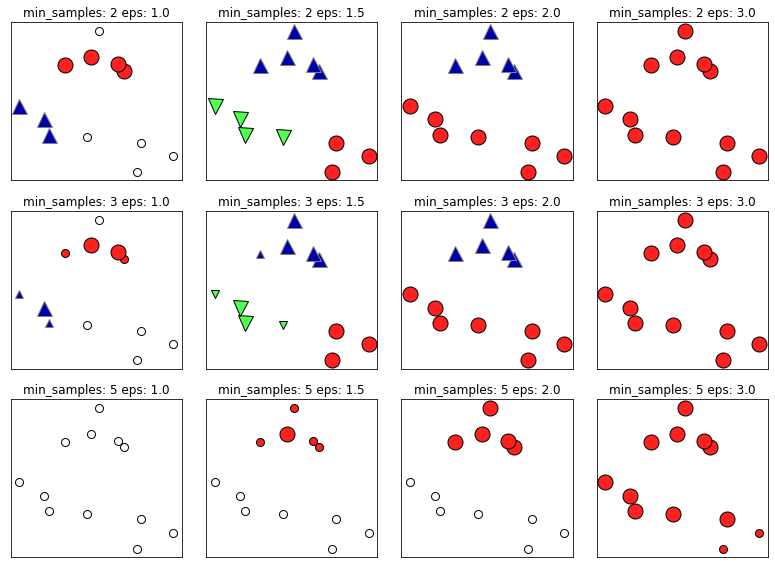

In [ ]:
mglearn.plots.plot_dbscan()

Алгоритм *DBSCAN* также выводит список принадлежности классам, где -1 определяет выбросы, а цифры от 0 до n - принадлежность к кластеру.

Данный алгоритм имеет следующие преимущества:
- не нужно явно указывать количество кластеров;
- можно использовать для данных любых форм;
- обнаруживает выбросы данных.

К недостаткам алгоритма можно отнести:
- сложности в работе с кластерами разной плотности;
- сложность выбора **eps**.

## Метрики качества кластеризации

Метрики качества кластеризации можно разделить на две категории: метки реальных классов известны и не известны. 

Для первой категории, к которой относятся данные с определением реальных кластеров, используется метрика **ARI** (*Adjusted Rand Index*):

`sklearn.metrics.adjusted_rand_score()`

 Она принимает значение близкое к *0* при случайном назначении кластеров и значение равное *1* при соответствии классов меткам. Например, дано:

- **y_true** - реальные кластеры - [5,2,2,5,8,5,5,8]
- **y_pred** - результат кластеризации, метки классов - [0,1,1,0,2,0,0,2], 

то результат: `ARI(y_pred, y_true) = 1`.

`sklearn.metrics.silhouette_score`

Для второй категории, когда нет информации о реальных кластерах, используется метод **Silhouette**, силуэтного коэффициента:

`sklearn.metrics.silhouette_score()`

Силуэтный коэффициент оценивает насколько глубоко один объект
находится внутри своего кластера и насколько он далек
от ближайшего соседнего. Расчет производится по формуле:

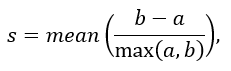

где

**s** - силуэтный коэффициент, среднее значение по всем точкам;

**a** - среднее расстояние между точками внутри кластера;

**b** - среднее расстояние до точек ближайшего кластера.





## Сравнение алгоритмов кластеризации K-Means, Agglomerative Clustering и DBSCAN





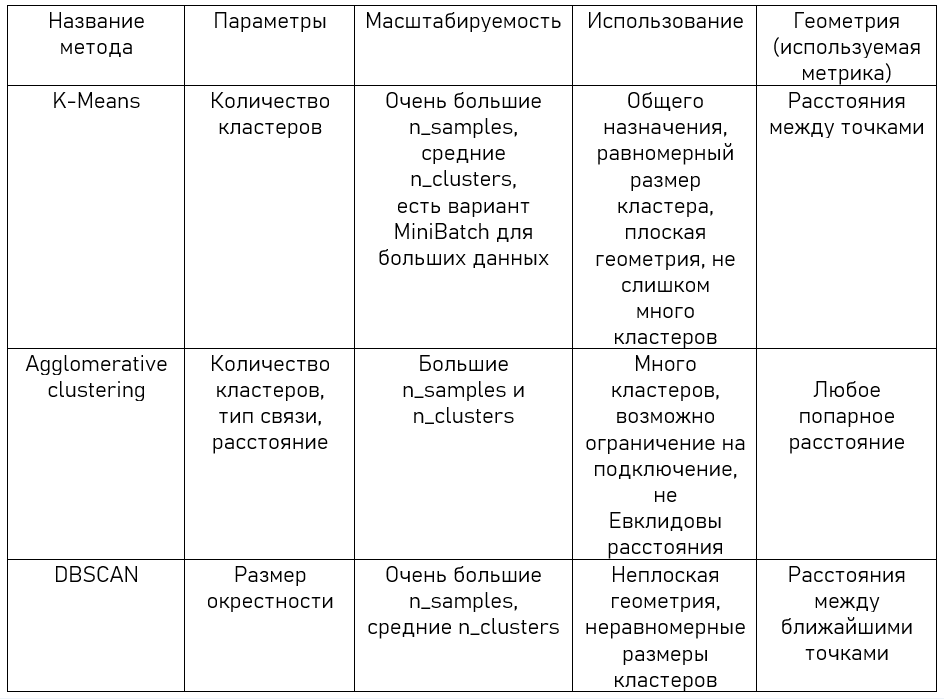

## Выводы

Итак, рассмотрев три вида кластеризации мы можем сделать сделующие выводы:
- кластеризация дает возможность найти структуру в неразмеченных данных, что может помочь в дальнейшей их обработке;
- каждый алгоритм использует различный подход к обработке данных, имеет приципиально отличный от других подход и, следовательно, может быть использован для конкретного набора данных;
- задача кластеризации не имеет правильного решения, метрики качества являются только вариантом приблизительной оценки для поиска решения, удовлетворяющего условию критерия остановки.

**Содержание темы**

1. Теория

2. [Практика 1](https://colab.research.google.com/drive/1hD2iZeqMoH8oITN7AFWOGiB9CMdwuvlw?usp=sharing) 

3. [Практика 2](https://colab.research.google.com/drive/1u-C4YluObVMEcjeOk8WnqQGm5AueaK_i?usp=sharing)